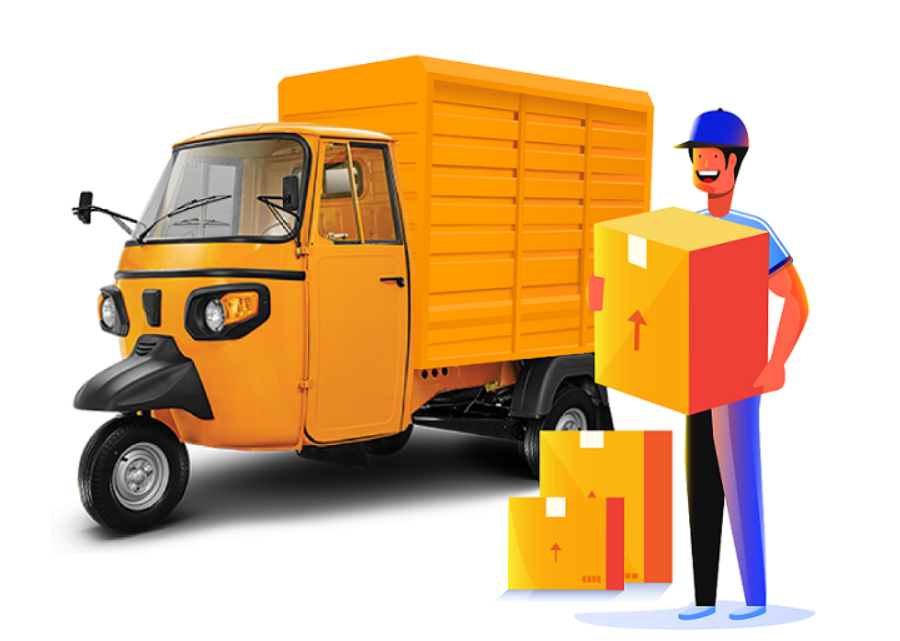

#Context

The case study is about India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, it strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

It works with a wide range of restaurants for delivering their items directly to the people.

It has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

#Know Your Data

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw=pd.read_csv('dataset.csv')

In [3]:
df_raw.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

- There are 197428 data points and 14 features
- There are some null values which will need treatment

#Data Cleaning / Feature Engg

##Treatment of Null Values

In [5]:
df1=df_raw.copy()

In [6]:
null_percentage = (df1.isnull().sum().sum() / df1.size) * 100
print(f"Percentage of null values in the dataset: {null_percentage:.2f}%")

Percentage of null values in the dataset: 2.01%


In [7]:
df1=df1.dropna()

Since the percentage of null values is 2%, so removing null values for now

##Check Duplicates

In [8]:
if df1.duplicated().any():
    print("Duplicates found.")
else:
    print("No duplicates found.")

No duplicates found.


##Convert Time Stamps and Creating Target Variable

In [9]:
# Convert timestamps to datetime format
df1["created_at"] = pd.to_datetime(df1["created_at"])
df1["actual_delivery_time"] = pd.to_datetime(df1["actual_delivery_time"])

# Compute delivery time in minutes
df1["delivery_time_mins"] = (df1["actual_delivery_time"] - df1["created_at"]).dt.total_seconds() / 60

##Extract Hour of the day and day of week

In [10]:
# Extract hour of the day and day of the week
df1["order_hour"] = df1["created_at"].dt.hour
df1["order_day"] = df1["created_at"].dt.dayofweek  # 0=Monday, 6=Sunday

##Convert Datatypes

In [11]:
print(df1.nunique())

market_id                        6
created_at                  163082
actual_delivery_time        160686
store_id                      5645
store_primary_category          73
order_protocol                   7
total_items                     54
subtotal                      8189
num_distinct_items              20
min_item_price                2251
max_item_price                2586
total_onshift_partners         172
total_busy_partners            158
total_outstanding_orders       281
delivery_time_mins            6984
order_hour                      19
order_day                        7
dtype: int64


In [12]:
# Convert columns with unique values < 100 to 'category'
for col in df1.columns:
    if df1[col].nunique() < 100:
        df1[col] = df1[col].astype('category')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 176248 non-null  category      
 1   created_at                176248 non-null  datetime64[ns]
 2   actual_delivery_time      176248 non-null  datetime64[ns]
 3   store_id                  176248 non-null  object        
 4   store_primary_category    176248 non-null  category      
 5   order_protocol            176248 non-null  category      
 6   total_items               176248 non-null  category      
 7   subtotal                  176248 non-null  int64         
 8   num_distinct_items        176248 non-null  category      
 9   min_item_price            176248 non-null  int64         
 10  max_item_price            176248 non-null  int64         
 11  total_onshift_partners    176248 non-null  float64       
 12  total_b

Final dataset after cleaning contains 176248 rows and 17 columns

##Outlier Treatment

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

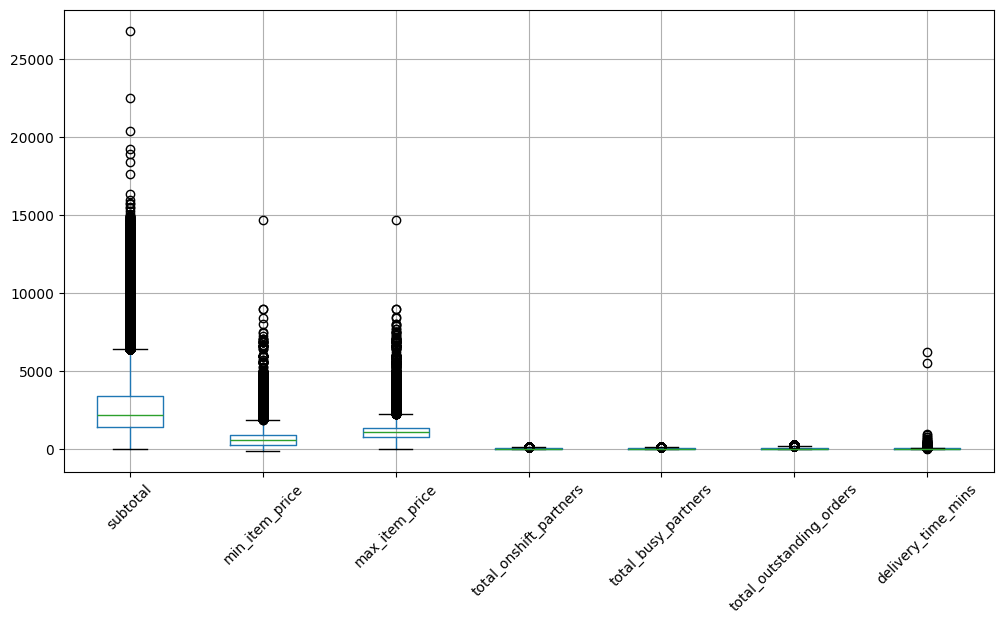

In [15]:
# Select numeric columns
numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns

# Set plot size
plt.figure(figsize=(12, 6))

# Create boxplots for each numeric column
df1[numeric_cols].boxplot(rot=45)

# Show plot
plt.show()

In [16]:
# Define capping limits (1st and 99th percentile)
lower_limit = df1[numeric_cols].quantile(0.01)
upper_limit = df1[numeric_cols].quantile(0.99)

# Apply capping
df1[numeric_cols] = df1[numeric_cols].clip(lower=lower_limit, upper=upper_limit, axis=1)

Performed capping to treat outliers with 1st and 99th percentile while keeping data structure intact to avoid loss of information.

#EDA / Data Visualization

##Distribution of Categorical Columns

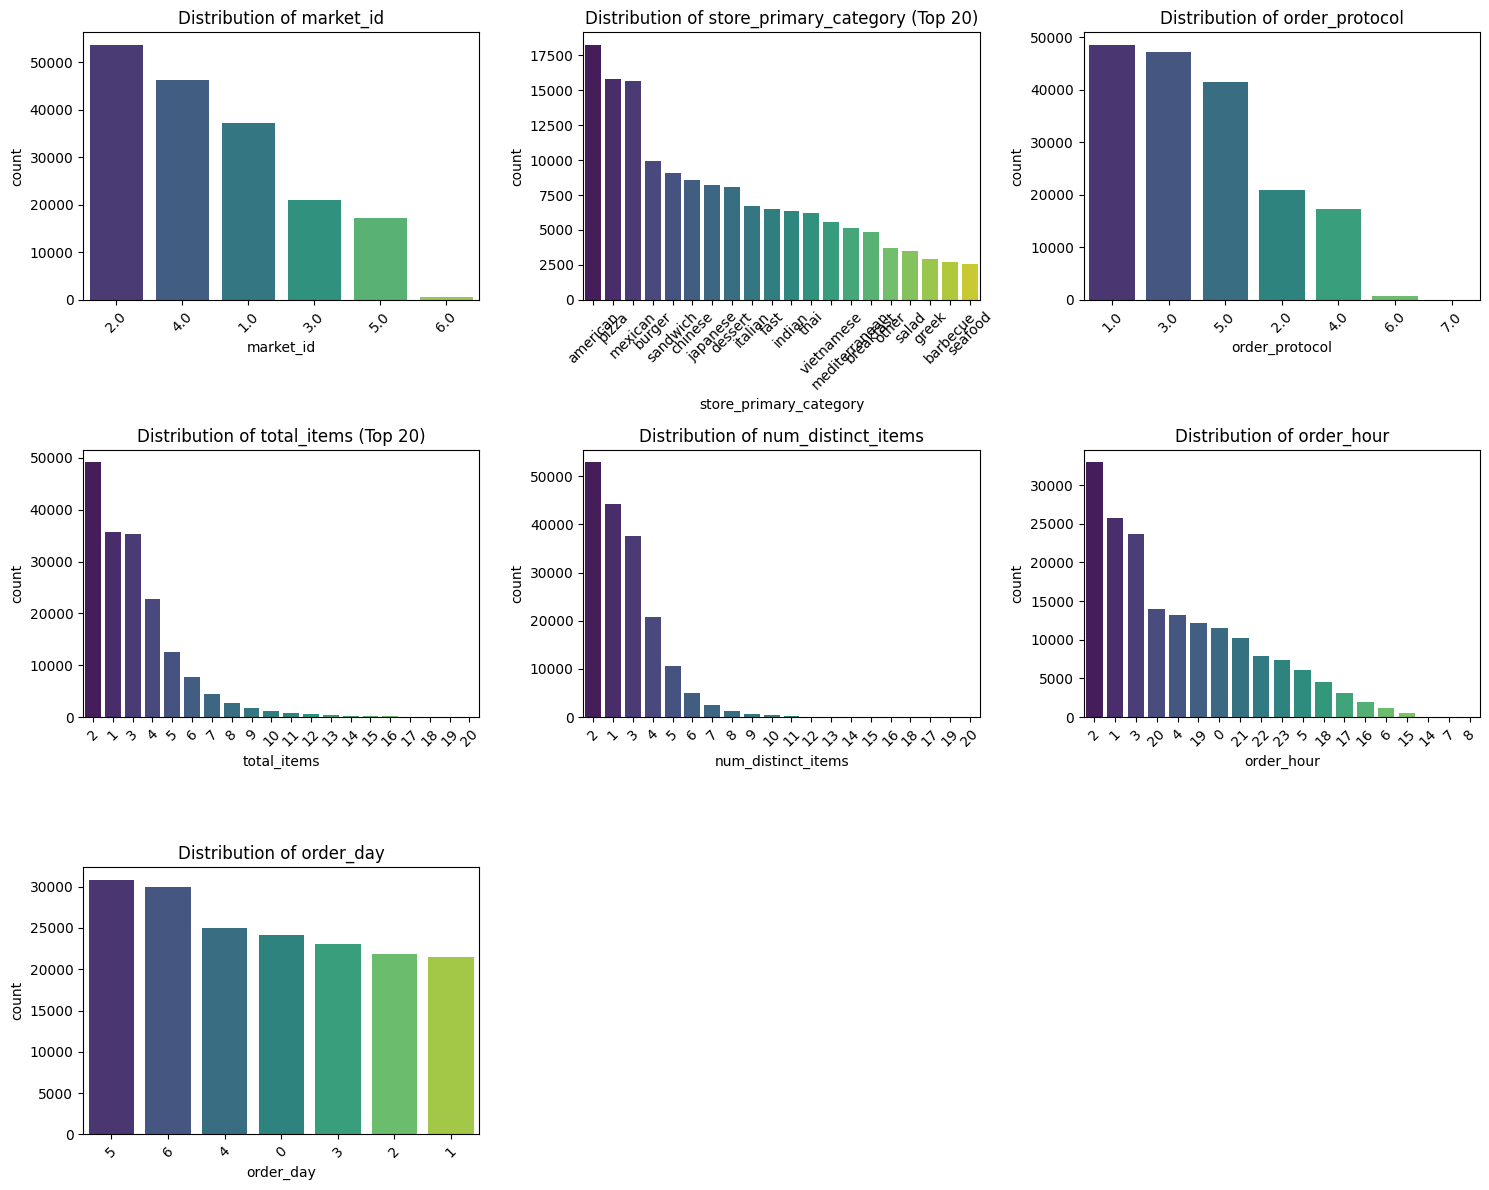

In [17]:
# Get categorical columns
cat_cols = df1.select_dtypes(include=['category']).columns

# Set figure size
plt.figure(figsize=(15, 12))

# Plot countplots for each categorical column
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols) // 3 + 1, 3, i)
    top_categories = df1[col].value_counts().nlargest(20).index  # Get top 20 categories
    sns.countplot(x=df1[col], palette='viridis', order=top_categories)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col} (Top 20)' if len(df1[col].unique()) > 20 else f'Distribution of {col}')

plt.tight_layout()
plt.show()


- Highest number of orders , more than 50k are from market_id 2.0 followed by market_id 4.0 and market_id 1.0
- 'american' is the store category with highest number of orders followed by 'pizza' and 'mexican'
- order_protocol 1.0 has highest number of orders followed by 3.0 and 5.0
- Maximum orders have total 2 items followed by 1 and 3 which is same as number of distinct items
- Most of the orders i.e more than 30k are placed in order_hour 2 followed by 1 and 3
- More than 30k orders were placed on 5th day of week followed by 6th day and 4th day


##order_hour vs delivery_time_mins (Boxplot)

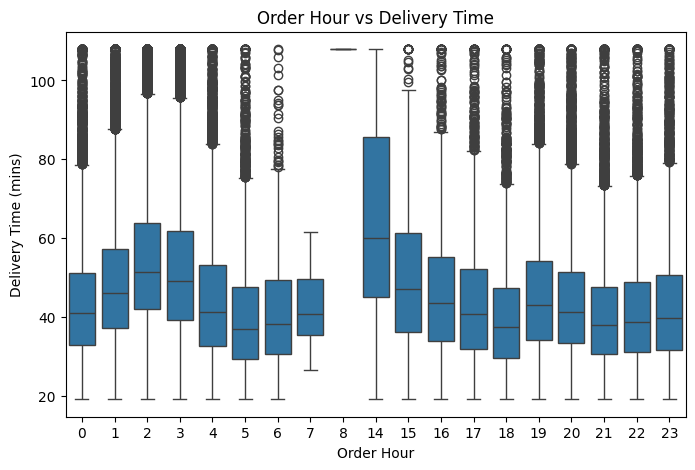

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='order_hour', y='delivery_time_mins', data=df1)
plt.title('Order Hour vs Delivery Time')
plt.xlabel('Order Hour')
plt.ylabel('Delivery Time (mins)')
plt.show()

In the Time based pattern i.e Boxplot of order_hour vs delivery_time_mins, there are Certain time slots (like peak hours) that have consistently higher delivery delays like 14:00 hrs followed by 02:00 hrs and 03:00 hrs which can be due to higher order volume during lunch time and Fewer active delivery partners during these off-peak hours like 2 AM and 3 AM.


##Distribution of Numeric Features

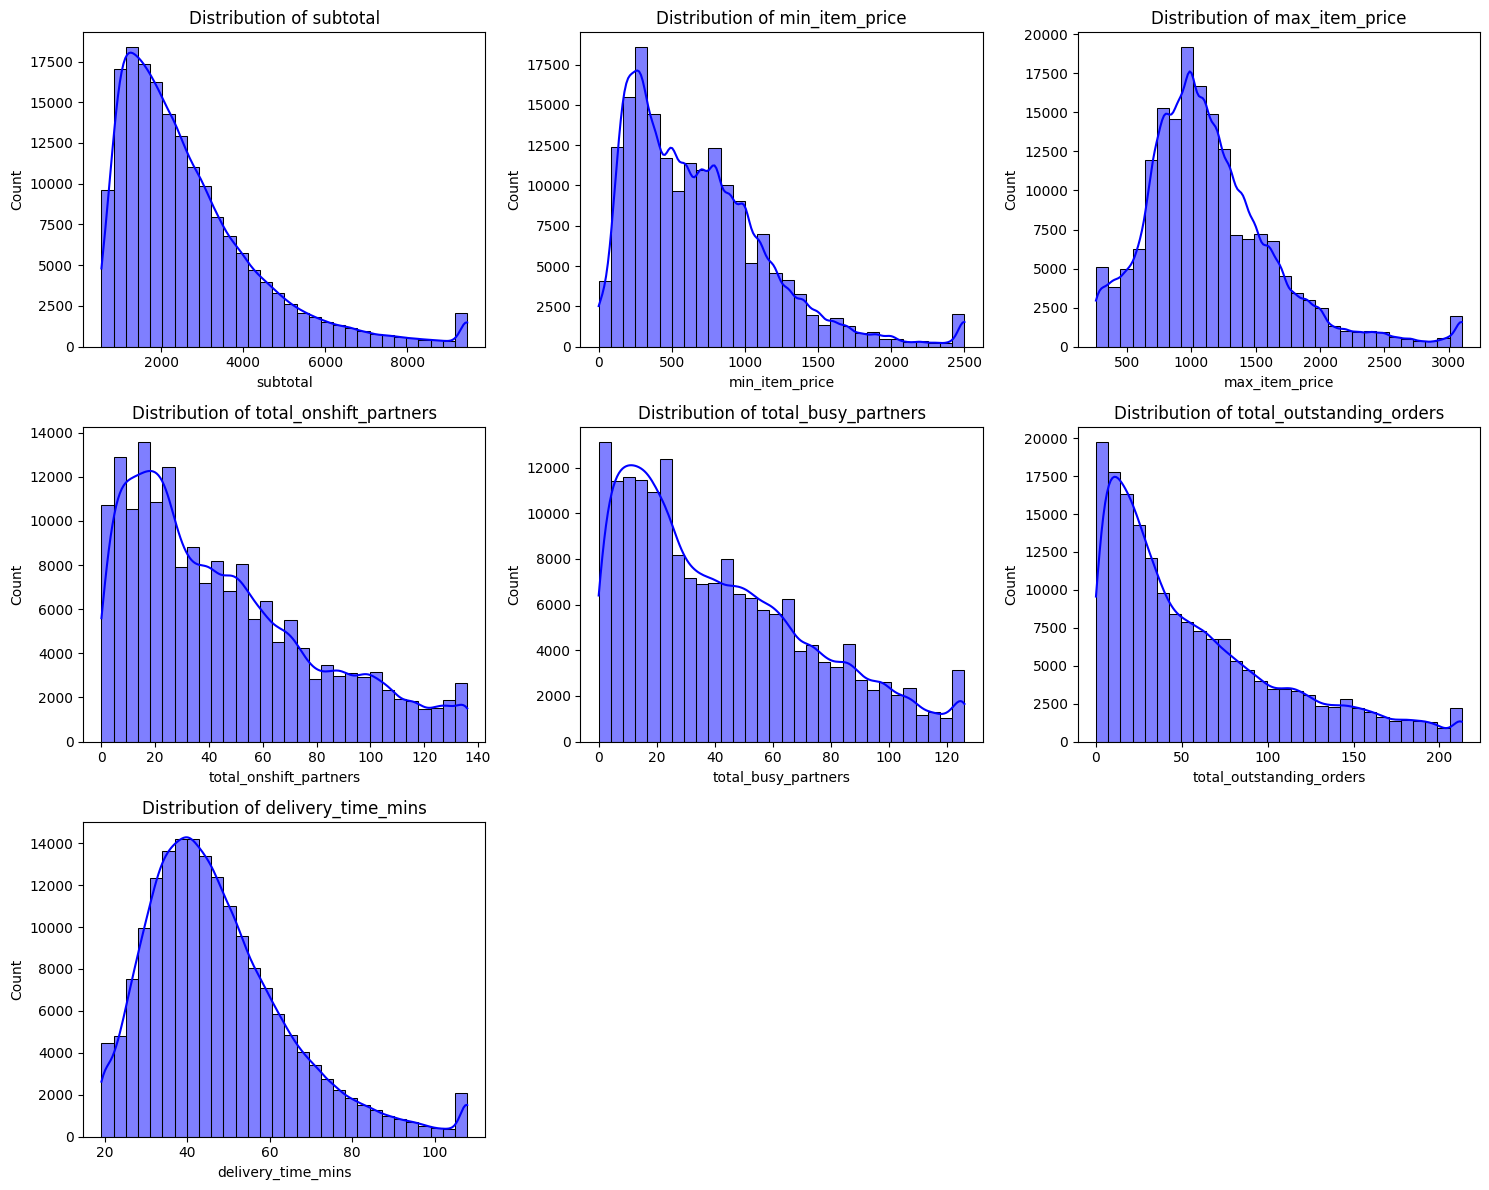

In [19]:
# Get numeric columns
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns

# Set figure size
plt.figure(figsize=(15, 12))

# Plot distribution for each numeric column
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)
    sns.histplot(df1[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

- Distribution of subtotal, min_item_price, total_onshift_partners, total_busy_partners and total_outstanding_orders is rightly skewed.
- max_item_price and delivery_time_mins are somewhat normally distributed

#Regression with Neural Networks

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
from sklearn.metrics import r2_score

##Prepare the Dataset

In [22]:
df2=df1.copy()

In [23]:
# Drop columns that are not needed for modeling.
# We drop 'created_at', 'actual_delivery_time', and 'store_id' since we already have time-based features.
df_model = df2.drop(columns=['created_at', 'actual_delivery_time', 'store_id'])

In [24]:
# Define features and target. Here, 'delivery_time_mins' is our target variable.
X = df_model.drop('delivery_time_mins', axis=1)
y = df_model['delivery_time_mins']

##Train Test Split

In [25]:
# First split: Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Train (75%) and Validation (25%) from the Train set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 25% of 80% = 20%

# Print shapes to confirm the splits
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (105748, 13) (105748,)
Validation set: (35250, 13) (35250,)
Test set: (35250, 13) (35250,)


##Encoding Categorical Columns

In [26]:
# Identify categorical columns in the training set
cat_cols = X_train.select_dtypes(include=['category']).columns.tolist()

In [27]:
# Initialize OneHotEncoder; sparse=False returns a dense array.
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [28]:
# Fit encoder on training data only
encoder.fit(X_train[cat_cols])

# Transform train, val, and test sets
X_train_encoded = encoder.transform(X_train[cat_cols])
X_val_encoded = encoder.transform(X_val[cat_cols])
X_test_encoded = encoder.transform(X_test[cat_cols])

##Scaling Numeric Columns

In [29]:
# Identify numeric columns in the training set
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [30]:
scaler = StandardScaler()

In [31]:
# Fit scaler on training numeric data and transform train and test numeric data.
X_train_num = scaler.fit_transform(X_train[num_cols])
X_val_num = scaler.transform(X_val[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

##Combine Processed Features

In [32]:
# Combine numeric and encoded categorical features
X_train_prepared = np.hstack([X_train_num, X_train_encoded])
X_val_prepared = np.hstack([X_val_num, X_val_encoded])
X_test_prepared = np.hstack([X_test_num, X_test_encoded])

In [33]:
print("Training data shape:", X_train_prepared.shape)
print("Validation data shape:", X_val_prepared.shape)
print("Test data shape:", X_test_prepared.shape)

Training data shape: (105748, 188)
Validation data shape: (35250, 188)
Test data shape: (35250, 188)


##Build the Neural Network Regression Model

In [34]:
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

In [35]:
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [36]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          24,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,561 (135.00 KB)

 Trainable params: 34,561 (135.00 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history1 = model1.fit(X_train_prepared, y_train, validation_data=(X_val_prepared, y_val),
                    epochs=50, batch_size=32, verbose=1)

Epoch 1/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 414.5133 - mae: 14.8353 - val_loss: 224.3437 - val_mae: 11.3120
Epoch 2/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 237.7509 - mae: 11.6737 - val_loss: 232.2425 - val_mae: 11.1665
Epoch 3/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 230.7907 - mae: 11.4803 - val_loss: 218.1706 - val_mae: 11.0547
Epoch 4/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 227.2667 - mae: 11.4236 - val_loss: 232.2573 - val_mae: 11.1447
Epoch 5/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 221.3606 - mae: 11.2738 - val_loss: 220.8884 - val_mae: 11.0211
Epoch 6/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 219.2419 - mae: 11.1949 - val_loss: 226.8977 - val_mae: 11.0985
Epoch 7/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 217.5662 - mae: 11.1847 - val_loss: 222.8432 - val_mae: 11.0143
Epoch 8/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 213.7491 - mae: 11.0780 - val_loss: 231.4996 - v

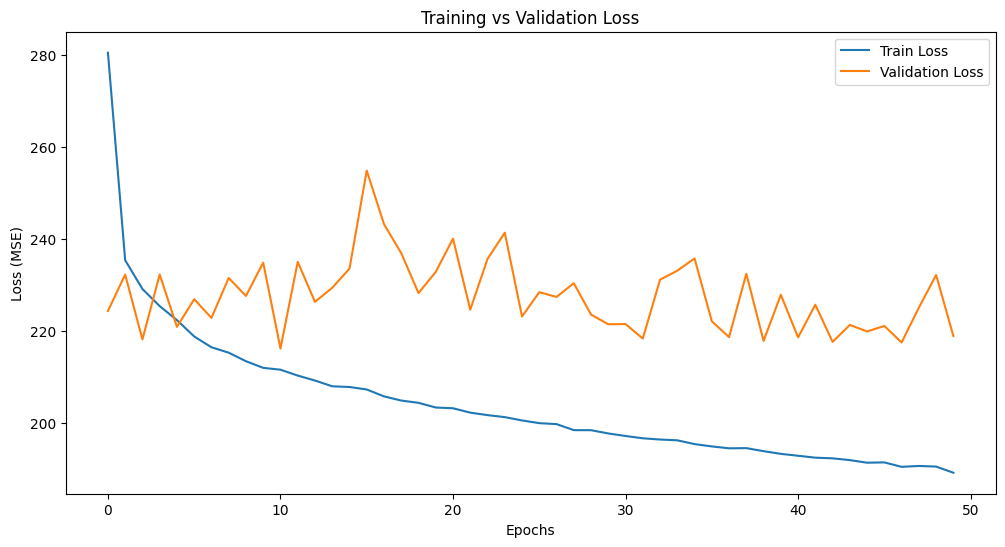

In [38]:
# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [39]:
# Predict on test set
y_pred1 = model1.predict(X_test_prepared)

1102/1102 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [40]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)

Mean Squared Error (MSE): 216.1339459369556
Root Mean Squared Error (RMSE): 14.701494683771294
Mean Absolute Error (MAE): 10.865666809738556
R2 Score: 0.2822292177265866


The basic sequential neural network model demonstrated an MSE of 216.13, indicating the average squared error magnitude. The RMSE of 14.70 suggests that, on average, predictions deviate by around 14.7 minutes from actual delivery times. The MAE of 10.87 further confirms this deviation in absolute terms. However, the R² score of 0.28 indicates that the model explains only 28% of the variance.

##Hyperparameter tuning with Keras Tuner

In [41]:
pip install tensorflow keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [42]:
from keras import layers
from keras_tuner import RandomSearch

In [43]:
# Function to Build Model
def build_model(hp):
    model = keras.Sequential()

    # Input Layer
    model.add(layers.Input(shape=(X_train_prepared.shape[1],)))

    # Hidden Layers (with varying neurons & dropout)
    for i in range(hp.Int('num_layers', 2, 4)):  # 2 to 4 layers
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
            activation='relu'
        ))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)))

    # Output Layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile Model
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.01])),
        loss='mse',
        metrics=['mae']
    )

    return model

In [44]:
from tensorflow import keras

In [45]:
# Initialize Tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,     # Tries 10 different combinations
    executions_per_trial=2,  # Each model runs 2 times for stability
    directory='tuner_results',
    project_name='quick_tuning'
)


##Model Training

In [46]:
# Perform Search with Early Stopping and History Tracking
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [47]:
history = tuner.search(
    X_train_prepared, y_train,
    validation_data=(X_val_prepared, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stopping]
)

Trial 10 Complete [00h 04m 47s]
val_loss: 219.41919708251953

Best val_loss So Far: 211.93119049072266
Total elapsed time: 00h 46m 23s


##Plot Losses and Evaluate Metrics

In [48]:
# Get Best Model
best_model = tuner.get_best_models(num_models=1)[0]

In [49]:
history_best = best_model.fit(
    X_train_prepared,
    y_train,
    validation_data=(X_val_prepared, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 224.9565 - mae: 11.3458 - val_loss: 212.6722 - val_mae: 11.0771
Epoch 2/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 227.4850 - mae: 11.3988 - val_loss: 217.1441 - val_mae: 11.0205
Epoch 3/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 222.8528 - mae: 11.3168 - val_loss: 213.6198 - val_mae: 11.0036
Epoch 4/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 219.2827 - mae: 11.2155 - val_loss: 215.3019 - val_mae: 10.9641
Epoch 5/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 221.2841 - mae: 11.2332 - val_loss: 213.3529 - val_mae: 11.0830
Epoch 6/50
3305/3305 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 219.6752 - mae: 11.1980 - val_loss: 213.1623 - val_mae: 11.1502


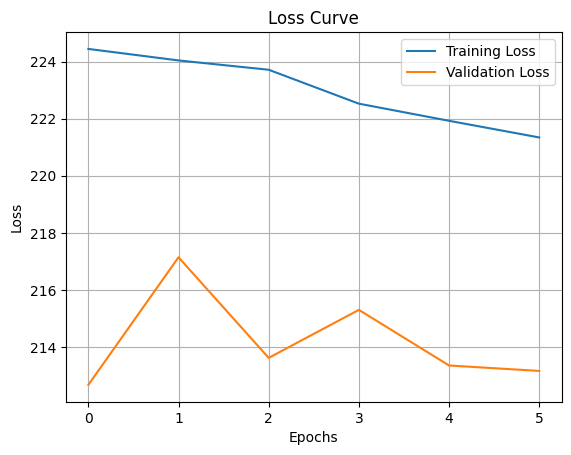

In [50]:
plt.plot(history_best.history['loss'], label='Training Loss')
plt.plot(history_best.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
# Evaluate on Test Data
y_pred = best_model.predict(X_test_prepared)

1102/1102 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [52]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 210.59
RMSE: 14.51
MAE: 11.01
R2 Score: 0.30


After hyperparameter tuning with Keras Tuner, the model's performance improved slightly. The MSE decreased to 210.59, and the RMSE reduced to 14.51, indicating a minor improvement in prediction accuracy. However, the MAE increased slightly to 11.01, suggesting some trade-offs in individual error magnitudes. The R² score improved to 0.30, meaning the model now explains 30% of the variance, up from 28%.

#Insights

- Final dataset after cleaning contains 176248 rows and 17 columns
- Performed capping to treat outliers with 1st and 99th percentile while keeping data structure intact to avoid loss of information.
- Highest number of orders , more than 50k are from market_id 2.0 followed by market_id 4.0 and market_id 1.0
- 'american' is the store category with highest number of orders followed by 'pizza' and 'mexican'
- order_protocol 1.0 has highest number of orders followed by 3.0 and 5.0
- Maximum orders have total 2 items followed by 1 and 3 which is same as number of distinct items
- Most of the orders i.e more than 30k are placed in order_hour 2 followed by 1 and 3
- More than 30k orders were placed on 5th day of week followed by 6th day and 4th day
- Distribution of subtotal, min_item_price, total_onshift_partners, total_busy_partners and total_outstanding_orders is rightly skewed.
- max_item_price and delivery_time_mins are somewhat normally distributed
- In the Time based pattern i.e Boxplot of order_hour vs delivery_time_mins, there are Certain time slots (like peak hours) that have consistently higher delivery delays like 14:00 hrs followed by 02:00 hrs and 03:00 hrs which can be due to higher order volume during lunch time and Fewer active delivery partners during these off-peak hours like 2 AM and 3 AM.
- The basic sequential neural network model demonstrated moderate predictive performance, achieving an R² score of 0.288, indicating that it explains 28.8% of the variance in the target variable. The RMSE of 14.64 suggests an average prediction error of approximately 14.64 units, while the MAE of 10.85 highlights an average absolute deviation of 10.85 units from actual values.
- After applying hyperparameter tuning using Keras Tuner, the model's performance improved slightly, with the R² score increasing to 0.31, explaining 31% of the variance in the target variable. The RMSE decreased to 14.45, indicating a marginal reduction in prediction error. However, the MAE remained nearly the same at 10.90

#Recommendations

##Understand How Reducing Delivery Times Impacts KPIs

**On-Time Delivery Rates:**

Reducing delivery delays during identified peak hours (e.g., 14:00, 02:00, and 03:00) can significantly improve on-time delivery rates. Enhancing partner allocation during these slots can positively impact customer satisfaction.

**Customer Satisfaction Scores:**

Predicting delivery times accurately will enable better customer communication, reducing frustration caused by unexpected delays.

✅ Action Point: Introduce a dynamic scheduling system that proactively allocates additional delivery partners during peak hours.

##Insights from Model Analysis — Factors Impacting Delivery Time

**Time of Day:**

Peak delivery delays during 14:00, 02:00, and 03:00 indicate a need for proactive workforce planning.

**Order Size:**

Orders with 2 or 3 items show faster delivery times, suggesting that mid-sized orders are easier to handle efficiently.

**Market Analysis:**

Market ID 2, 4, and 1 contribute the highest volume of orders. Prioritizing resource allocation in these markets can improve overall efficiency.

**Store Category Impact:**

Popular categories like ‘American’, ‘Pizza’, and ‘Mexican’ may require better partner distribution to avoid bottlenecks.

✅ Action Point: Implement a time-based flag (e.g., "rush_hour") and an order complexity score to improve model accuracy.

##Model Performance — Alignment with Business Goals

The tuned model’s R² score improved to 0.31, explaining 31% of delivery time variance. While this shows moderate predictive power, the improved RMSE (14.45) indicates reduced prediction error.

Despite the model’s limitations, it aligns with the complex nature of last-mile delivery, where multiple unpredictable factors like traffic, weather, and partner availability play a role.

✅ Action Point: Develop a confidence interval for predicted delivery times to help operations teams manage customer expectations.

##Trade-offs and Model Design Considerations

**Feature Engineering:**

Time-based features improved model performance but introduced complexity.
Capping outliers ensured data structure integrity, balancing accuracy with robustness.

**Model Architecture:**

The tuned model's architecture favored a simpler structure with fewer neurons to prevent overfitting, balancing complexity and efficiency.

**Hyperparameter Tuning:**

While improving accuracy, tuning extended model training time. Reducing epochs or batch size can help optimize future training efforts.

✅ Action Point: Consider implementing batch normalization for faster convergence in future iterations.

##Future Enhancements — Adapting to Changing Patterns

**Evolving Order Patterns:**

As customer behavior shifts, periodic retraining of the model using fresh data will ensure sustained accuracy.

**Expanding Services:**

Adding new markets or restaurant categories may require adjustments to features such as delivery zones, partner availability, and demand forecasting.

✅ Action Point: Establish a model retraining pipeline that periodically updates the model with new data.

## Continuous Improvement Framework

Integrate real-time partner location data, traffic conditions, and weather updates to improve predictions.

Encourage feedback from delivery partners to identify key factors influencing delays that may not be captured in the dataset.

✅ Action Point: Introduce a feedback loop to collect data from partners and customers, refining the model’s predictions over time.



#Leading Questions

## Defining the problem statements and where can this and modifications of this be used?

**Potential Extensions & Modifications.**

This model can be adapted for various other use cases:

Dynamic Route Optimization: Using real-time traffic data to provide updated delivery estimates.

Order Prioritization System: Identifying high-priority orders and adjusting partner assignments accordingly.

Demand Forecasting: Predicting peak demand periods for better resource allocation.

Driver Incentive Optimization: Assigning incentives based on efficient deliveries.

Customer Communication: Sending real-time updates to customers about their delivery status.

**Industry Applications Beyond Food Delivery**

E-commerce: Predicting delivery times for packages.

Courier Services: Estimating pickup/drop-off timelines.

Grocery Delivery: Optimizing perishable item delivery.

Healthcare Logistics: Ensuring timely delivery of medical supplies.

## List 3 functions the pandas datetime provides with one line explanation.

Here are 3 useful pandas datetime functions with brief explanations:

pd.to_datetime()
➤ Converts a column or string to a datetime object for easier date manipulation.

.dt.strftime()
➤ Formats datetime objects into custom string formats (e.g., '%Y-%m-%d').

.dt.dayofweek
➤ Extracts the day of the week as an integer (Monday = 0, Sunday = 6).

##Short note on datetime, timedelta, time span (period)

Short Note on Key Time Concepts in Pandas
1. datetime

  Represents a specific point in time (e.g., "2025-03-11 10:30:00").
Useful for tracking events, timestamps, and time-based indexing.
2. timedelta

  Represents a duration or the difference between two dates/times (e.g., "2 days 4 hours").
Useful for calculating time gaps, delays, or shifts.
3. Period (Time Span)

  Represents a fixed time interval like a day, month, or year (e.g., "2025-03" for March 2025).
Useful for time series analysis with consistent intervals.

##Why do we need to check for outliers in our data?

Outliers are extreme values that differ significantly from other observations. Identifying and handling outliers is crucial because they can:

✅ Distort Statistical Analysis: Outliers can heavily impact mean, standard deviation, and correlation, leading to incorrect insights.

✅ Affect Model Performance: Machine learning models, especially regression models and neural networks, are sensitive to outliers, which may cause poor predictions.

✅ Skew Data Distribution: Outliers can distort the shape of data distributions, impacting assumptions of normality in certain models.

✅ Indicate Data Errors or Valuable Insights: Outliers may reveal data entry mistakes, sensor errors, or even rare but meaningful patterns.

##Name 3 outlier removal methods?

1. IQR (Interquartile Range) Method

  Identifies outliers by calculating the IQR (Q3 - Q1) and defining outlier boundaries as:


    Lower Bound=Q1−1.5×IQR


    Upper Bound=Q3+1.5×IQR
2. Z-Score (Standard Score) Method

Measures how far a data point is from the mean in terms of standard deviations.
Data points with a Z-score > 3 or < -3 are considered outliers.
3. Isolation Forest (Machine Learning Technique)

An unsupervised learning algorithm designed specifically to detect outliers by isolating anomalies in the dataset through decision trees.

##What classical machine learning methods can we use for this problem?

Classical Machine Learning Methods for Delivery Time Estimation:
1. Linear Regression

  Simple and interpretable; assumes a linear relationship between features and delivery time.
2. Ridge Regression / Lasso Regression

  Effective for handling multicollinearity and reducing overfitting.
3. Decision Tree Regressor

  Captures non-linear patterns well; prone to overfitting without proper tuning.
3. Random Forest Regressor

  An ensemble method that combines multiple decision trees for better performance and reduced overfitting.
4. XGBoost / LightGBM / CatBoost

  Powerful gradient boosting algorithms that handle complex patterns efficiently; often outperform other models with proper tuning.
5. K-Nearest Neighbors (KNN) Regressor

  Suitable for small datasets; can capture non-linear relationships but may struggle with large datasets.
6. Support Vector Regressor (SVR)

  Effective for high-dimensional data; works well for complex patterns with appropriate kernel selection.

##Why is scaling required for neural networks?

Scaling is crucial for neural networks due to the following reasons:

1. Faster Convergence:

  Neural networks use gradient-based optimization (like SGD, Adam). Large feature values can cause gradients to fluctuate significantly, slowing down convergence. Scaling keeps the values in a stable range.
2. Improved Model Performance:

  Unscaled data may lead to certain features dominating the learning process, causing the model to perform poorly. Scaling ensures all features contribute equally.
3. Prevention of Exploding/Vanishing Gradients:

  Extremely large or small values can result in gradients becoming too large (exploding) or too small (vanishing), hindering learning. Scaling mitigates this.
4. Consistent Weight Updates:

  Features with different ranges can lead to inconsistent weight updates. Scaling ensures uniform updates, improving stability.
5. Activation Functions' Efficiency:

  Functions like ReLU, Sigmoid, and Tanh perform optimally when input values are within a certain range (e.g., [-1, 1] or [0, 1]).

##Briefly explain your choice of optimizer.

Used Adam (Adaptive Moment Estimation) optimizer due to the following key reasons:

1. Adaptive Learning Rates:
Adam automatically adjusts the learning rate for each parameter, adapting as training progresses. This helps in efficiently handling features with different scales — ideal for datasets like yours.
2. Faster Convergence:
Adam combines the strengths of RMSprop (good for sparse gradients) and Momentum (speeds up convergence), making it highly efficient for faster learning.
3. Robust to Noisy Data:
Since Adam adapts learning rates individually, it performs well even when the dataset has some noise or outliers.
4. Suitable for Deep Networks:
Neural networks with multiple layers (like yours) often face vanishing/exploding gradients. Adam's dynamic learning rate adjustment mitigates this issue.
5. Optimal for MSE Loss in Regression Tasks:
Since the target variable (delivery_time_mins) is continuous, Adam aligns well with the regression objective, minimizing MSE effectively.

##Which activation function did you use and why?

In my model, have used ReLU for the hidden layers. Here's why:

Why ReLU?

✅ Efficient and Fast:

ReLU is computationally efficient since it performs only a simple max(0, x) operation. This speeds up training significantly in large datasets like yours.

✅ Prevents Vanishing Gradient Problem:

Unlike sigmoid or tanh, ReLU does not saturate for positive values, allowing gradients to flow effectively and improving learning in deeper networks.

✅ Sparse Activation:

ReLU outputs zero for all negative inputs, introducing sparsity. This helps the model focus only on the most important features.

✅ Proven Performance:

ReLU has consistently shown superior performance in deep learning tasks, especially in regression problems like your delivery time estimation.

##Why does a neural network perform well on a large dataset?

Neural networks excel with large datasets due to several key factors:

1. High Capacity to Learn Complex Patterns
Neural networks have multiple layers (deep architecture) with numerous neurons, enabling them to capture intricate relationships and complex non-linear patterns.
In large datasets, this capacity helps the model generalize better by identifying subtle data patterns that simpler models might miss.
2. More Data Reduces Overfitting
Deep networks are prone to overfitting on small datasets.
A larger dataset provides more diverse examples, allowing the network to learn general trends instead of memorizing noise or irrelevant details.
3. Improved Feature Learning
Neural networks can automatically extract meaningful features from raw data.
With ample data, they effectively identify critical features without requiring extensive manual feature engineering.
4. Better Optimization with Stochastic Gradient Descent (SGD)
Large datasets enable more stable gradient updates in SGD, improving convergence.
Techniques like batch normalization further stabilize training.
5. Regularization Techniques Become More Effective
Methods like dropout, early stopping, and L2 regularization work best with larger datasets.
They control overfitting while ensuring the network learns generalizable patterns.
6. Data Augmentation and Diversity
Large datasets naturally cover a wider range of conditions (e.g., peak hours, traffic delays in your delivery case), helping the model handle real-world scenarios effectively.
